<H1> Lab exercise 3: Eigenvalues and SVD</h1>

<h2><i>Part 1: Eigenvalues and SVD in Python</i></h2>

_This part of the lab is an introduction to eigenvalues, eigenvectors, singular values and SVD in Python. Whereas you probably worked with eigenvalues/eigenvectors before, singular values and SVD is probably new._ 

<h3>Eigenvalues - Short Background</h3>

A matrix $A$ times vector $x$ is a linear transformation of $x$ that stretches and rotates the vector $x$. 
We will begin by getting some intuition for such transformations using a particular matrix $A$.

_1.1) Run the cell below to import the required packages and define the function `plot_vect`. This function can be used to plot two vectors in a coordinate system. The next cell defines a matrix $A$ and vector $x$. Run this cell to plot the vector $x$ together with the linear transformation $Ax$ on the specified domain. Change the vector $x$ a few times to convince yourself that $Ax$ results in stretching and rotating of the vector $x$._

In [9]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def plot_vect(x, b, xlim, ylim):
    '''
    function to plot two vectors, 
    x - the original vector
    b - the transformed vector
    xlim - the limit for x
    ylim - the limit for y
    '''
    plt.figure(figsize = (10, 6))
    plt.quiver(0,0,x[0],x[1],\
        color='black',angles='xy',\
        scale_units='xy',scale=1,\
        label='Original vector')
    plt.quiver(0,0,b[0],b[1],\
        color='g',angles='xy',\
        scale_units='xy',scale=1,\
        label ='Transformed vector')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.grid(True)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()
    plt.show()

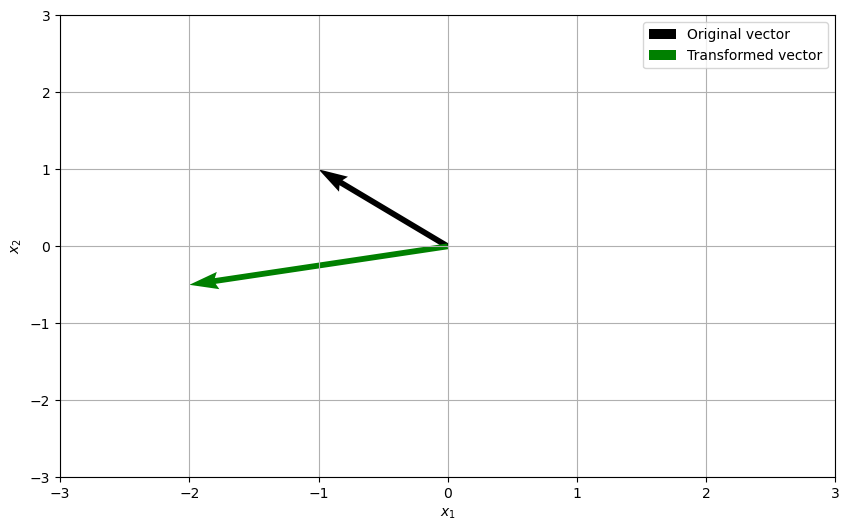

In [10]:
A = np.array([[2, 0],[0, -0.5]])
x = np.array([[-1],[1]])
Ax = A@x
plot_vect(x, Ax, (-3,3), (-3,3))

The matrix used in the previous task is
$ 
A = \left( \begin{array}{cc}
2 & 0 \\
0 & -0.5
\end{array} \right)
$
with eigenvectors 
$
\begin{array}{ll}
v_1 = \left( \begin{array}{c} 
0 \\
1
\end{array} \right)
&
v_2 = \left( \begin{array}{c} 
1 \\
0
\end{array} \right)
\end{array}.
$

To remind ourselves what an eigenvector is, we will use the matrix $A$ to perform a linear transformation of these eigenvectors.

_1.2) Repeat the previous task, but define the eigenvectors of the matrix $A$ as $x$-vector. In what way is the linear transformation different now (compared to the transformation obtained using any other vector)?_

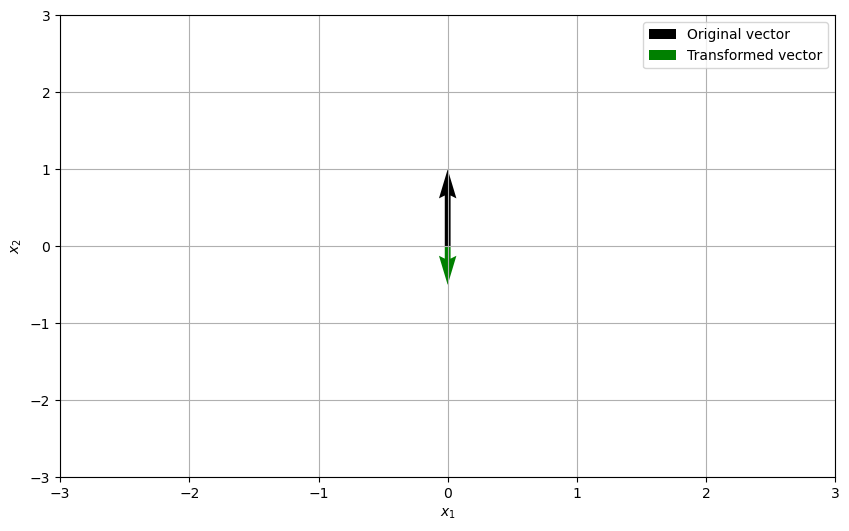

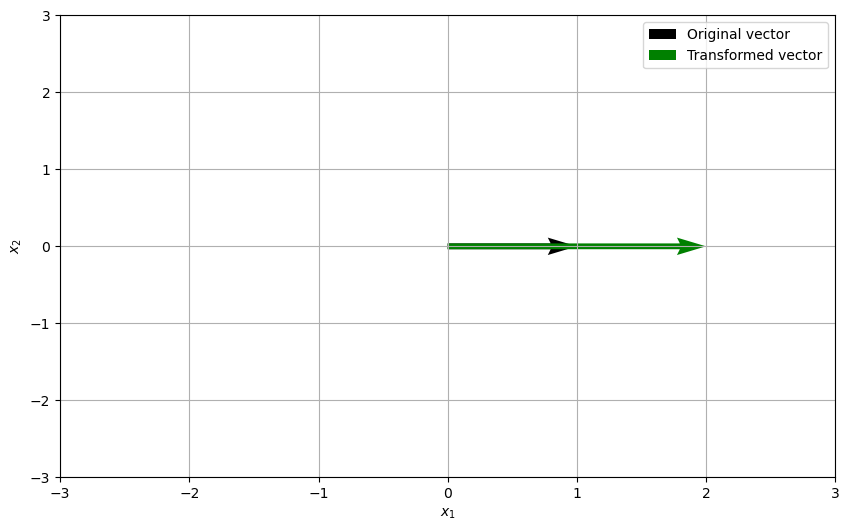

In [11]:
A = np.array([[2, 0],[0, -0.5]])
x1 = np.array([[0],[1]])
x2 = np.array([[1],[0]])
Ax1 = A@x1
Ax2 = A@x2
plot_vect(x1, Ax1, (-3,3), (-3,3))
plot_vect(x2, Ax2, (-3,3), (-3,3))

The conclusion is that eigenvectors are vectors in which the transformation only lead to scaling (no rotation), and the scaling factor is the corresponding eigenvalue. This can be written $Av = \lambda v$, which is the eigenvalue problem. Thus, the eigenvalue problem for a matrix $A$ is solved by an eigenvalue $\lambda$, together with the corresponding eigenvector $v$.

_1.3) From the plots you obtained in Task 1.2), what are the eigenvalues of $A$?_

They should be -0.5 for (0,1) and 2 for (1,0).


# Eigenvalues and Eigenvectors

In linear algebra, eigenvalues and eigenvectors are fundamental concepts associated with square matrices.

## Eigenvalues

An eigenvalue of a square matrix A is a scalar (λ) that satisfies the following equation:

$$A \mathbf{v} = \lambda \mathbf{v}$$

Where:
- $A$ is the square matrix.
- $\mathbf{v}$ is a non-zero vector, known as the eigenvector corresponding to eigenvalue $\lambda$.
- $\lambda$ is the eigenvalue we are trying to find.

In other words, an eigenvalue $\lambda$ of matrix $A$ and its corresponding eigenvector $\mathbf{v}$ have the property that when you multiply matrix $A$ by the eigenvector $\mathbf{v}$, you get a scaled version of $\mathbf{v}$.

Eigenvalues provide essential information about the behavior of linear transformations represented by matrices. They are often used in various applications, including solving differential equations, stability analysis in physics, and dimensionality reduction in machine learning.

## Eigenvectors

Eigenvectors are the non-zero vectors that correspond to eigenvalues. Given an eigenvalue $\lambda$ of matrix $A$, the corresponding eigenvector $\mathbf{v}$ is the solution to the equation:

$$A \mathbf{v} = \lambda \mathbf{v}$$

Eigenvectors represent the directions along which the linear transformation represented by matrix $A$ scales vectors. They are crucial in applications like principal component analysis (PCA) for data dimensionality reduction and solving systems of linear differential equations.

In summary, eigenvalues and eigenvectors are mathematical concepts that provide insights into the behavior of linear transformations and are widely used in various fields, including mathematics, physics, engineering, and data analysis.


# How to find them?

## Eigenvalues ($\lambda$):

To find the eigenvalues of a square matrix A, you need to solve the characteristic equation, which is given by:

$$A \mathbf{v} = \lambda \mathbf{v}$$

This equation tells us that when we apply matrix $A$ to the eigenvector $\mathbf{v}$, we get a scaled version of $\mathbf{v}$.

Rearrange the equation:

$$A \mathbf{v} - \lambda \mathbf{v}=0$$

Factor out $\mathbf{v}$:

$$(A−\lambda I)v=0,$$

where $I$ is the identity matrix of size $n \times n$.

Now, we want to find non-trivial solutions (i.e., $\mathbf{v} \neq \mathbf{0}$) for the equation. This means that the matrix $A - \lambda I$ must be singular (not invertible), because if it were invertible, the only solution would be $\mathbf{v} = \mathbf{0}$.

To determine when a matrix is singular, we compute its determinant:

$$det(A−\lambda I)=0.$$

This is the characteristic equation. It represents the values of $\lambda$ for which the matrix $A - \lambda I$ is singular, and those values of $\lambda$ are the eigenvalues of matrix $A$.

## Eigenvectors ($\mathbf{v}$):

Once you have found the eigenvalues, you can find the corresponding eigenvectors by solving the equation for each eigenvalue. Given an eigenvalue $\lambda$, you solve the equation:

$$(A−\lambda I)v=0.$$

Here, you're looking for a non-zero vector $\mathbf{v}$ (the eigenvector) that, when multiplied by $(A - \lambda I)$, equals the zero vector. This is typically done by solving a system of linear equations. The solutions to this system will give you the eigenvectors corresponding to the eigenvalues you found in step 1.

Normalization:

Eigenvectors are often normalized to have a magnitude of 1, which makes them more interpretable and useful. 

This process can be repeated for each eigenvalue to find its corresponding eigenvector. Keep in mind that not all matrices have a full set of eigenvalues and eigenvectors. Some matrices may have complex eigenvalues and corresponding eigenvectors, while others may have repeated eigenvalues with multiple linearly independent eigenvectors. The process described above works for diagonalizable matrices, which are a subset of square matrices.

<h3>Eigenvalues and Eigenvectors in Numpy</h3>

In numpy, the command `S, V = np.linalg.eig(A)` computes the eigenvectors/eigenvectors of the matrix $A$, where $S$ is a vector with A's eigenvalues and $V$ is a matrix containing the corresponding eigenvectors stored as columns. The eigenvectors are always normalized (unit length). <br>

_2.1) Use _np.linalg.eig_ to find the eigenvalues and eigenvectors of the matrix_

a) $A =\left( \begin{array}{cc}
 2 & 0 \\
 0 & -0.5
 \end{array} \right)$ (the marix used above)
 <br><br>
b) $B =\left( \begin{array}{ccc}
 2 & 3 & 1 \\
 0 & 0.5 & 2 \\
 0 &  0  & 1
 \end{array} \right) $ (Note, the eigenvalues of a triangular matrix are equal to the diagonal elements)
 <br><br>
c) $C =\left( \begin{array}{ccc}
 -1 & 3 & 1 \\
 1 & 0.5 & 2 \\
 1 &  -4  & 5
 \end{array} \right) $ (Note, complex eigenvalues always comes in complex conjugate pairs)


In [38]:
# (a)

A = np.array([[2, 0],[0, -0.5]])
S, V = np.linalg.eig(A)
V = [sublist.tolist() for sublist in V]
print("Eigenvalues of matrix A: ", S)
print("Eigenvectors of matrix A: ", V)
print("\n")
# (b)

B = np.array([[2, 3, 1],[0, 0.5, 2], [0, 0, 1]])
S, V = np.linalg.eig(B)
V = [sublist.tolist() for sublist in V]
print("Eigenvalues of matrix B: ", S)
print("Eigenvectors of matrix B: ", V)
print("\n")
# (c)

C = np.array([[-1, 3, 1],[1, 0.5, 2], [1, -4, 5]])
S, V = np.linalg.eig(C)
V = [sublist.tolist() for sublist in V]
print("Eigenvalues of matrix C: ", S)
print("Eigenvectors of matrix C: ", V)

Eigenvalues of matrix A:  [ 2.  -0.5]
Eigenvectors of matrix A:  [[1.0, 0.0], [0.0, 1.0]]


Eigenvalues of matrix B:  [2.  0.5 1. ]
Eigenvectors of matrix B:  [[1.0, -0.8944271909999159, -0.9532062476387964], [0.0, 0.4472135954999579, 0.2932942300427066], [0.0, 0.0, 0.07332355751067665]]


Eigenvalues of matrix C:  [-1.86486172+0.j          3.18243086+1.65581423j  3.18243086-1.65581423j]
Eigenvectors of matrix C:  [[(0.9494679691427074+0j), (-0.2869932552851798+0.38749442883499946j), (-0.2869932552851798-0.38749442883499946j)], [(-0.190597708185679+0j), (-0.3845312638714765+0.3818203797814662j), (-0.3845312638714765-0.3818203797814662j)], [(-0.249365372909691+0j), (-0.6883544462931834+0j), (-0.6883544462931834-0j)]]


According to _the spectral theorem_, a symmetric $nxn$-matrix $A$ always has $n$ distinct and real eigenvalues and the associated eigenvectors are orthogonal. Thus, for an eigenvalue $\lambda_i$ of a symmetric matrix $A$ with corresponding eigenvector $v_i$, it holds that $Av_i=\lambda_i v_i$ for each $i$, so that $Av_1=\lambda_1 v_1, \ldots , Av_n = \lambda_n v_n$, where the $v_i's$ are orthogonal. If we put $v_i$ into a matrix we can write <br>

$$
A \left( \begin{array}{ccc} 
  & & \\
 v_1& \cdots & v_n \\
  & & 
  \end{array} \right) = \left( \begin{array}{ccc} 
  & & \\
 v_1& \cdots & v_n \\
  & & 
  \end{array} \right)
  \left( \begin{array}{ccc} 
  \lambda_1& & \\
   & \ddots &  \\
  & & \lambda_n 
  \end{array} \right) \Rightarrow AV = V D.
$$
<br>

Thus, since the eigenvectors are orthogonal, it holds that $V^TV = VV^T = I$, where $I$ is the identity matrix. The matrix $V$ is said to be orthogonal.

_2.2) Check that this is true for a couple of symmetric matrices, i.e. check that the matrix has $n$ distrinct eigenvalues and that the corresponding eigenvectors are orthogonal using the method described above. You can for example use the matrices: 
 <br><br>
a) $A =\left( \begin{array}{ccc}
 2 & 3 & 1 \\
 3 & 0.5 & 2 \\
 1 &  2  & 1
 \end{array} \right) $ <br><br>
b) $C = B^TB$, where $B =\left( \begin{array}{ccc}
 -1 & 3 & 1 \\
 1 & 0.5 & 2 \\
 1 &  -4  & 5
 \end{array} \right) $._ <br>
 

In [50]:
A = np.array([[2, 3, 1],[3, 0.5, 2], [1, 2, 1]])
S, V = np.linalg.eig(A)
VxV=np.transpose(V)@V
print("Eigenvalues of matrix A: ", S)
print("Q^TQ: ", VxV)
print("\n")

# (c)
B = np.array([[-1, 3, 1],[1, 0.5, 2], [1, -4, 5]])
C = np.transpose(B)@B
S, V = np.linalg.eig(C)
VxV=np.transpose(V)@V
print("Eigenvalues of matrix C: ", S)
print("Eigenvectors of matrix C: ", VxV)

Eigenvalues of matrix A:  [ 5.31594878  0.38466894 -2.20061772]
Q^TQ:  [[ 1.00000000e+00 -5.55111512e-17  2.22044605e-16]
 [-5.55111512e-17  1.00000000e+00 -5.55111512e-17]
 [ 2.22044605e-16 -5.55111512e-17  1.00000000e+00]]


Eigenvalues of matrix C:  [45.61418662  1.09408677 11.54172661]
Eigenvectors of matrix C:  [[ 1.00000000e+00  6.66133815e-16 -3.33066907e-16]
 [ 6.66133815e-16  1.00000000e+00  4.16333634e-17]
 [-3.33066907e-16  4.16333634e-17  1.00000000e+00]]



The relations you have seen above, $AV = VD$ together with $V^TV = VV^T = I$, lead to an important result, namely <i>the eigendecomposition</i> of $A$: $A = VDV^T$.

<h3>The singular value decomposition (SVD)</h3>

Eigenvalues and eigenvectors require square matrices. What can be done when the matrix $A$ is non-square, for example an over-determined system (more rows than columns)?<br>

We can work with $A^TA$ and $AA^T$ instead. These are always symmetric and we can therefore find the eigendemposition.

_3.1) Define the matrix_
$A =\left( \begin{array}{ccc}
 2 & 3 & 1 \\
 3 & 0.5 & 2 \\
 1 &  2  & 1 \\
 0 & 1 & 2 
 \end{array} \right) $
 _and compute the eigenvalues and eigenvectors of $A^TA$ and $AA^T$, respectively. Compare the eigenvalues of the two matrices. Are they similar in any way?_ 

In [14]:
A = np.array([[2, 3, 1],[3, 0.5, 2], [1, 2, 1], [0, 1, 2]])
ATA = np.transpose(A)@A
AAT = A@np.transpose(A)
S, V = np.linalg.eig(ATA)
print("Eigenvalues of matrix A^TA: ", S)
print("Eigenvectors of matrix A^TA: ", V)
print("\n")

S, V = np.linalg.eig(AAT)
print(r"Eigenvalues of matrix AA^T: ", S)
print("Eigenvectors of matrix AA^T: ", V)

Eigenvalues of matrix A^TA:  [30.63189054  2.75264907  4.86546039]
Eigenvectors of matrix A^TA:  [[-0.61758858 -0.57278641  0.53898059]
 [-0.60409484 -0.09336822 -0.7914239 ]
 [-0.50364051  0.81436976  0.28835417]]


Eigenvalues of matrix AA^T:  [ 3.06318905e+01 -6.94953969e-16  2.75264907e+00  4.86546039e+00]
Eigenvectors of matrix AA^T:  [[ 0.6416176   0.4937143   0.368455    0.45696165]
 [ 0.57133115 -0.04937143  0.08215473 -0.81510354]
 [ 0.42088231 -0.83931431 -0.03305801  0.34251532]
 [ 0.29114542  0.22217143 -0.92541811  0.09734229]]


You should have noted that $A^TA$ and $AA^T$ have the same non-zero eigenvalues (they might come in different order, though), and the remaining eigenvalues are zero. This is always the case. Now, we will compare the results with a decomposition called the _Singular Value Decomposition (SVD)_. The SVD of a matrix $A$ is defined as $A=U \Sigma V^T$, where $U$ is a matrix containing the so-called left singular vectors of $A$ in its columns, $V$ is a matrix containing the right singular vectors of $A$ in its columns, and $\Sigma$ is a diagonal matrix defined as below, containing the singular values of $A$, $\sigma_i$, along its diagonal:
<br>
<br>
$\Sigma = \left( \begin{array}{ccc} \sigma_1 & & \\ & \ddots & \\ &  & \sigma_n \end{array} \right) $

_3.2) What does the SVD of $A$ have to do with the matrices $A^TA$ and $AA^T$? The code snippet below calculates the SVD of the matrix $A$ (the same matrix $A$ as in Task 3.1). Run the cell and compare the SVD with eigenvalues and eigenvectors of $A^TA$ and $AA^T$ you found in the previous task. What similarities do you find?_

In [15]:
U, S, Vt = np.linalg.svd(A, full_matrices=True)   # The SVD of A, singular values in S
V = np.transpose(Vt)

print(f'The singular values of A are: {S}')
print('Hint: Look at the square of the singular values!')

print('The matrix U:')
print(U)

print('The matrix V:')
print(V)

The singular values of A are: [5.53460844 2.20577886 1.65911093]
Hint: Look at the square of the singular values!
The matrix U:
[[-0.6416176  -0.45696165  0.368455    0.4937143 ]
 [-0.57133115  0.81510354  0.08215473 -0.04937143]
 [-0.42088231 -0.34251532 -0.03305801 -0.83931431]
 [-0.29114542 -0.09734229 -0.92541811  0.22217143]]
The matrix V:
[[-0.61758858  0.53898059  0.57278641]
 [-0.60409484 -0.7914239   0.09336822]
 [-0.50364051  0.28835417 -0.81436976]]


**Conclusion:** <br>
$A$'s left singular vectors $U$ (columns of U) are equal to the eigenvectors of $AA^T$ (sign might differ)<br>
$A$'s right singular vectors $V$ (columns of V) are equal to the eigenvectors of $A^TA$ (sign might differ)<br>
$A$'s singular values are the square root of $A^TA$'s eigenvalues (or $AA^T$'s nonzero eigenvalues) <br>
<br>
There are many applications where SVD is used (you will see one in part 3 of this lab). In data analysis, we often have big non-square matrices with data, and SVD is as an important tool. 
